<a href="https://colab.research.google.com/github/KennyLuu24/Pokemon_Gotta_Code_-em_All-Final_Project-.ipynb/blob/main/Pokemon_Gotta_Code_%E2%80%98em_All(Final_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pokemon Gotta Code ‘em All**
## By Kenny Luu and Alexander Lien


# Introduction:
Pokemon are fictional animal in the game each with their owns basic stats to determine its strength, agility, speed, etc.You can use it fight aganist other pokemon to become stronger. The better the stats, the better they are in battle. There are generations each with it own Pokemon characters, you can think of this as a season on a TV series.
> We are trying to see if each stats have a correlation with the type of pokemon they are and the generation they belong

#Dataset that we will be using


**Pokemon**

<img src="https://suntrustblog.com/the-best-pokemon-games/maxresdefault-62/" width=700>

This dataset is about the pokemon games (NOT pokemon cards or Pokemon Go). It includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. These are the raw attributes used for calculating how much damage an attack will do in the games.

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [ ]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv'
poke_df = pd.read_csv(data_url)
poke_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---



#Method
The method we are going to use for our data are
* P-test
* Two-Tailed Test
* Central Tendencies
* Z-score
* User-defined function
* Conditional
* Correlation

#Central Tendency: What are the average basic stats between non-legendary and legendary Pokemon? How much stronger is the Legendary Pokemon in comparison of the non-legendary

In [ ]:
#First we need to create a dataframe for Legendary and Non-Legendary Pokemon
Basic_stats = poke_df[['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].copy()
Basic_stats

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,False
1,60,62,63,80,80,60,False
2,80,82,83,100,100,80,False
3,80,100,123,122,120,80,False
4,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,True
796,50,160,110,160,110,110,True
797,80,110,60,150,130,70,True
798,80,160,60,170,130,80,True


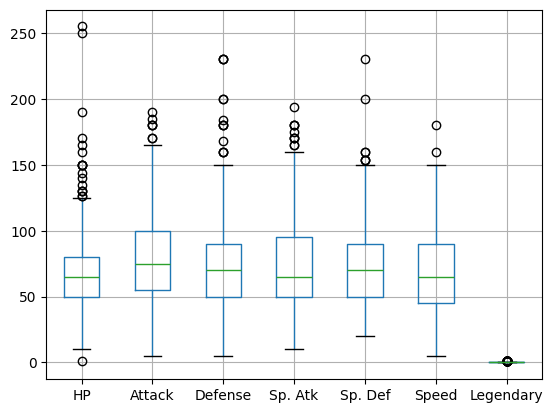

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame(Basic_stats)

# Create a boxplot for all numerical columns
df.boxplot()
plt.show()

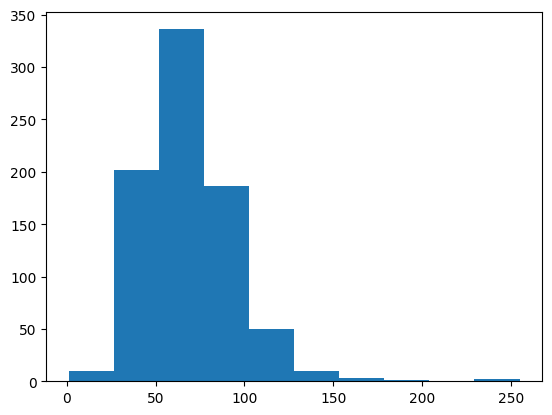

In [ ]:
f = plt.hist(Basic_stats['HP'])

In [ ]:
NonLeg_stats = Basic_stats[(Basic_stats['Legendary'] == False)]
NonLeg_stats

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,False
1,60,62,63,80,80,60,False
2,80,82,83,100,100,80,False
3,80,100,123,122,120,80,False
4,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...
787,85,100,122,58,75,54,False
788,55,69,85,32,35,28,False
789,95,117,184,44,46,28,False
790,40,30,35,45,40,55,False


In [ ]:
#We need to observe their average inorder to do a comparison
HP_mean = NonLeg_stats.HP.mean()
Attack_mean = NonLeg_stats.Attack.mean()
Defense_mean = NonLeg_stats.Defense.mean()
Sp_Atk_mean = NonLeg_stats['Sp. Atk'].mean()
Sp_Def_mean = NonLeg_stats['Sp. Def'].mean()
Speed_mean = NonLeg_stats.Speed.mean()
NonLeg_dict = {'Average HP': [HP_mean],
              'Average Attack': [Attack_mean],
              'Average Defense': [Defense_mean],
               'Average Sp. Atk': [Sp_Atk_mean],
              'Average Sp. Def': [Sp_Def_mean],
              'Average Speed': [Speed_mean]}
Non_Leg_avg_stats = pd.DataFrame(NonLeg_dict)
Non_Leg_avg_stats

,Average HP,Average Attack,Average Defense,Average Sp. Atk,Average Sp. Def,Average Speed
0,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782


In [ ]:
Leg_stats = Basic_stats[(Basic_stats['Legendary'] == True)]
Leg_stats

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
156,90,85,100,95,125,85,True
157,90,90,85,125,90,100,True
158,90,100,90,125,85,90,True
162,106,110,90,154,90,130,True
163,106,190,100,154,100,130,True
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,True
796,50,160,110,160,110,110,True
797,80,110,60,150,130,70,True
798,80,160,60,170,130,80,True


In [ ]:
#Now we do the same for Legendary
HP_mean = Leg_stats.HP.mean()
Attack_mean = Leg_stats.Attack.mean()
Defense_mean = Leg_stats.Defense.mean()
Sp_Atk_mean = Leg_stats['Sp. Atk'].mean()
Sp_Def_mean = Leg_stats['Sp. Def'].mean()
Speed_mean = Leg_stats.Speed.mean()
NonLeg_dict = {'Average HP': [HP_mean],
              'Average Attack': [Attack_mean],
              'Average Defense': [Defense_mean],
               'Average Sp. Atk': [Sp_Atk_mean],
              'Average Sp. Def': [Sp_Def_mean],
              'Average Speed': [Speed_mean]}
Leg_avg_stats = pd.DataFrame(NonLeg_dict)
Leg_avg_stats

,Average HP,Average Attack,Average Defense,Average Sp. Atk,Average Sp. Def,Average Speed
0,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615


In [ ]:
#Let combine both dataframe into one so we could create a comparison
L_and_NonL_stats = pd.concat([Non_Leg_avg_stats,Leg_avg_stats])
L_and_NonL_stats

,Average HP,Average Attack,Average Defense,Average Sp. Atk,Average Sp. Def,Average Speed
0,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
0,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615


These results shows the power that Legendary Pokemon uphold against the Non-Legendary Pokemon. Legendary Pokemon overpower them mostly in the Attack, , Special Attack, Special Defense and Speed. Hp and Defense is where they are not as significant stronger compared to Non-Legendary Pokemon

# P-Testing: How much different is one generation's "total stats" compared to the overall generation?

$H_{0}:$ : There is no difference in stats between each generation

$H_{A}:$ : There is a significant difference in stats between each generation

In [ ]:
#Since we are comparing the stats, we need the population mean and standard deviation inorder to compare the data later on
poke_mean = poke_df['Total'].mean()
poke_mean =  round(poke_mean,2)
print('Population mean is', poke_mean)
poke_sd = poke_df['Total'].std()
poke_sd = round(poke_sd,2)
print('Population standard deviation is', poke_sd)

Population mean is 435.1
Population standard deviation is 119.96


In [ ]:
#Here is the coding for the mean and sample number of each generation
#Gen 1
Sam_num_Gen1 = int((len(poke_df[(poke_df['Generation'] == 1)]) / 2))
gen_1 = poke_df[(poke_df['Generation'] == 1)]
gen_1_sample = gen_1.sample(Sam_num_Gen1)
Sam_mean_Gen1 = round(gen_1_sample['Total'].mean(),2)

#Gen 2
Sam_num_Gen2 = int((len(poke_df[(poke_df['Generation'] == 2)]) / 2))
gen_2 = poke_df[(poke_df['Generation'] == 2)]
gen_2_sample = gen_2.sample(Sam_num_Gen2)
Sam_mean_Gen2 = round(gen_2_sample['Total'].mean(),2)

#Gen 3
Sam_num_Gen3 = int((len(poke_df[(poke_df['Generation'] == 3)]) / 2))
gen_3 = poke_df[(poke_df['Generation'] == 3)]
gen_3_sample = gen_3.sample(Sam_num_Gen3)
Sam_mean_Gen3 = round(gen_3_sample['Total'].mean(),2)

#Gen 4
Sam_num_Gen4 = int((len(poke_df[(poke_df['Generation'] == 4)]) / 2))
gen_4 = poke_df[(poke_df['Generation'] == 4)]
gen_4_sample = gen_4.sample(Sam_num_Gen4)
Sam_mean_Gen4 = round(gen_4_sample['Total'].mean(),2)

#Gen 5
Sam_num_Gen5 = int((len(poke_df[(poke_df['Generation'] == 5)]) / 2))
gen_5 = poke_df[(poke_df['Generation'] == 5)]
gen_5_sample = gen_5.sample(Sam_num_Gen5)
Sam_mean_Gen5 = round(gen_5_sample['Total'].mean(),2)

#Gen 6
Sam_num_Gen6 = int((len(poke_df[(poke_df['Generation'] == 2)]) / 2))
gen_6 = poke_df[(poke_df['Generation'] == 2)]
gen_6_sample = gen_6.sample(Sam_num_Gen6)
Sam_mean_Gen6 = round(gen_6_sample['Total'].mean(),2)

In [ ]:
#A simplified version of the top one
def gen_mean(Generation):
 for i in range(1):
    if Generation == 1:
      print('Mean is', Sam_mean_Gen1, 'and the sample number is', Sam_num_Gen1)
    elif Generation == 2:
      print('Mean is', Sam_mean_Gen2, 'and the sample number is', Sam_num_Gen2)
    elif Generation == 3:
      print('Mean is', Sam_mean_Gen3, 'and the sample number is', Sam_num_Gen3)
    elif Generation == 4:
      print('Mean is', Sam_mean_Gen4, 'and the sample number is', Sam_num_Gen4)
    elif Generation == 5:
      print('Mean is', Sam_mean_Gen5, 'and the sample number is', Sam_num_Gen5)
    elif Generation == 6:
      print('Mean is', Sam_mean_Gen6, 'and the sample number is', Sam_num_Gen6)
    else:
      print('Choose a number from 1-6')

In [ ]:
#Instead of getting confused by the long code above us, we can input the generation number inorder to see the mean and sample for our z-score
gen_mean(1)

Mean is 434.95 and the sample number is 83


In [ ]:
#z-score to determine the generation z-score compared to the overall population
import numpy as np
def z_score(poke_sd, poke_mean, gen_mean, n):
  z = (gen_mean - poke_mean) / (poke_sd/np.sqrt(n))
  return print(f'Z is {round(z,2)}')

The hypothesis is 2 tailed, with alpha = 0.05, it will have 2 z critical values of -1.96 and 1.96 to determine whether the generation is too strong or too weak.

In [ ]:
#Now we need to get the z-score of each generation and compare it against the population
gen_1_z = z_score(poke_sd, poke_mean, Sam_mean_Gen1, Sam_num_Gen1)
gen_2_z = z_score(poke_sd, poke_mean, Sam_mean_Gen2, Sam_num_Gen2)
gen_3_z = z_score(poke_sd, poke_mean, Sam_mean_Gen3, Sam_num_Gen3)
gen_4_z = z_score(poke_sd, poke_mean, Sam_mean_Gen4, Sam_num_Gen4)
gen_5_z = z_score(poke_sd, poke_mean, Sam_mean_Gen5, Sam_num_Gen5)
gen_6_z = z_score(poke_sd, poke_mean, Sam_mean_Gen6, Sam_num_Gen6)


Z is -0.01
Z is -1.69
Z is 0.97
Z is 1.71
Z is 0.54
Z is -2.34


The generation is within the critical values thus we can say we can retain the null hypothesis.

# Correlation: Is there a relation between the basic stats of Legendary Pokemon and the generation?



In [ ]:
# Let's create a dataframe
Poke_stats = poke_df[['Generation','Legendary', 'Total']].copy()
Poke_stats
Legend_stats = Poke_stats[(Poke_stats['Legendary'] == True)]
Legend_stats

,Generation,Legendary,Total
156,1,True,580
157,1,True,580
158,1,True,580
162,1,True,680
163,1,True,780
...,...,...,...
795,6,True,600
796,6,True,700
797,6,True,600
798,6,True,680


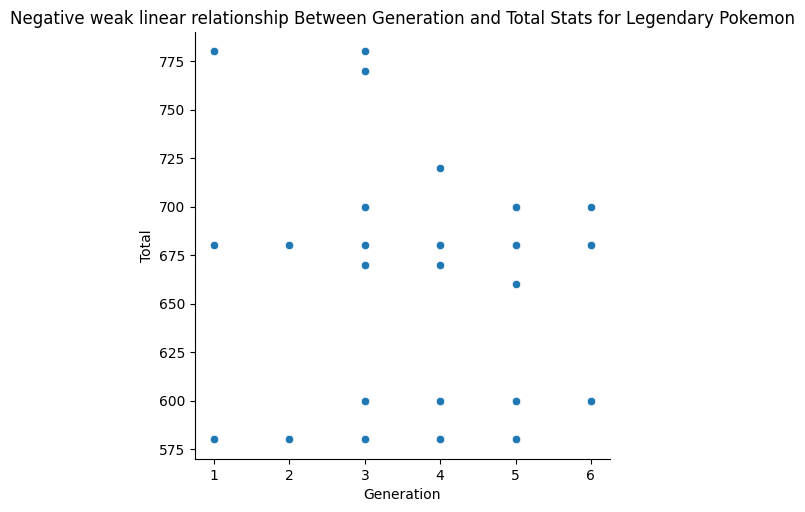

In [ ]:
#We need to create a scatter plot for this data
import seaborn as sns

# Create the relplot
sns.relplot(
    data = Legend_stats,
    x = 'Generation',
    y = 'Total'
).set(title="Negative weak linear relationship Between Generation and Total Stats for Legendary Pokemon");

In [ ]:
#Let's analyze the correlation by calculating the Pearson Correlation coefficient
import pandas as pd
x_data = Legend_stats['Generation']
y_data = Legend_stats['Total']

x = pd.Series(x_data)
y = pd.Series(y_data)

pearson_r_xy = round(x.corr(y), 3)
print(f"The Pearson correlation coefficient is {pearson_r_xy}")

The Pearson correlation coefficient is -0.123


In [ ]:
# We can check if the Pearson correlation coefficient is significant by finding the p-value
import pandas as pd
import numpy as np
from scipy import stats

pearson_corr, p_value = stats.pearsonr(x_data, y_data)
print(f'The p-value is {round(p_value,3)}')

if (p_value) < 0.05:
    print(f"Pearson correlation coefficient is statistically significant")
else:
    print(f"Pearson correlation coefficient is NOT statistically significant")


The p-value is 0.328
Pearson correlation coefficient is NOT statistically significant


In [ ]:
# 5 we observe the confidence intervals
import numpy as np
def pearsonr_ci(x, y, alpha=0.05):
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(len(x)-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return lo, hi
CI_lo, CI_hi = pearsonr_ci(x_data, y_data)

print(f'The confidence interval of the Pearson correlation coefficient is ({round(CI_lo,4)}, {round(CI_hi,4)}).')

The confidence interval of the Pearson correlation coefficient is (-0.3564, 0.1244).


Since our Pearson correlation coefficient falls in range with the confidence intervals, (-0.3564 < -0.123 < 0.1244),which is far from 0 thus shows there is a weak negative linear relationship. In addition, the p-value of 0.328 is bigger than the alpha level of α  = 0.05. Therefore, we have enough evidence to retain the null, showing that there is a negative yet not significant correlation between Legedary's Stats and the Generation the Pokemon belongs in.  

# Conclusion
  From our overall research on this data, we learned that

 >The Central Tendency allows us to get the average stats of Non-Legendary Pokemon and Legendary POkemon which we could use for comparison

 > The P-Test shows there isn't a significant difference in generation overall stats compared to the others one.  

 > The Correlation test shows that there is a negative correlation with Legendary Pokemon's total stats between generations but it isn't significant

 >1 things we wish that we could do is to include ending stats/their stats at their highest level inorder to be used for pokemon comparison amongst one another.  Not all pokemon level up the same so it would be a great insight on how each Pokemon grows at what rate and what Pokemon is good for certain time if we want to get into a game.

 >Something we could improve on is shortening our coding, the coding looks long which might be hard to understand for someone who new to coding to understand. It would also become like a shortcut for certain code and become less tedious but we learned and improve as we continue coding.